In [17]:
import numpy as np
import h5py
from uatu.watchers import key_func

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [19]:
#fname = '/home/sean/Git/uatu/data/snd4.samples.hdf5'
fname = '/scratch/users/swmclau2/UatuLightconeTest/UatuLightconePreds.hdf5'

In [20]:
f = h5py.File(fname, 'r')

In [21]:
len(f.keys())

50

In [22]:
cosmo_preds = np.zeros((len(f.keys()), 4))
cosmo_true = np.zeros((len(f.keys()), 2))

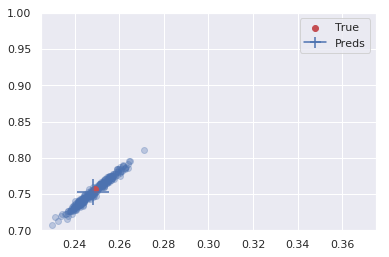

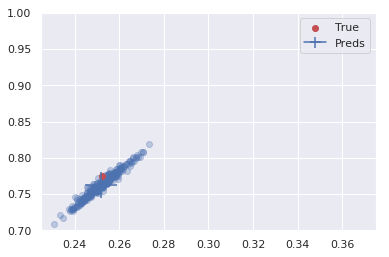

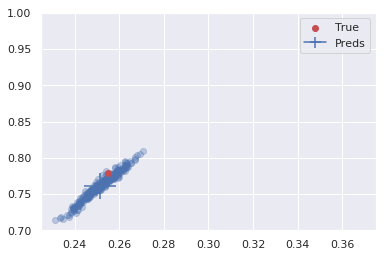

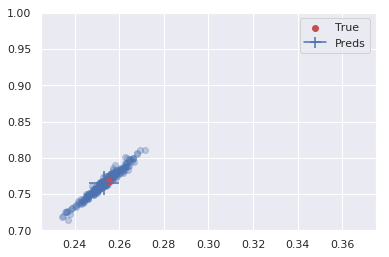

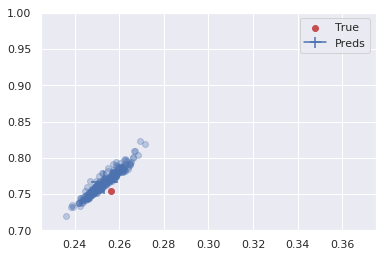

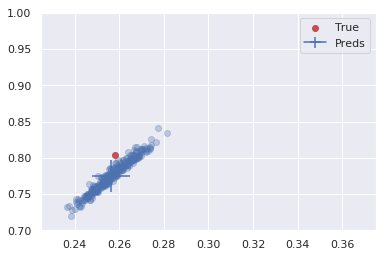

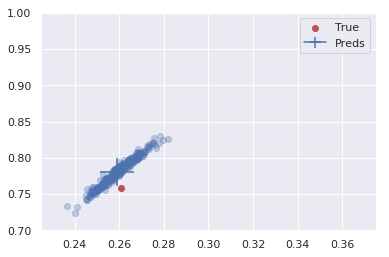

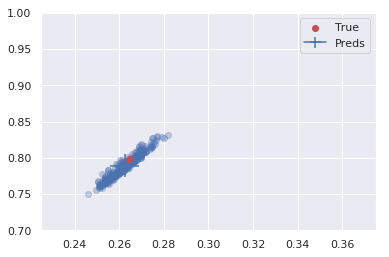

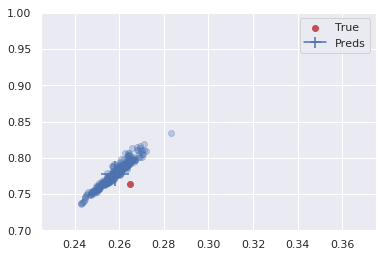

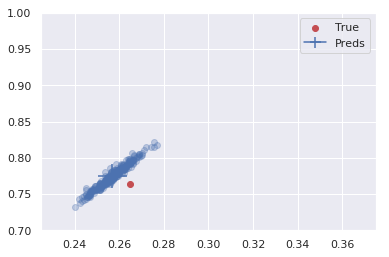

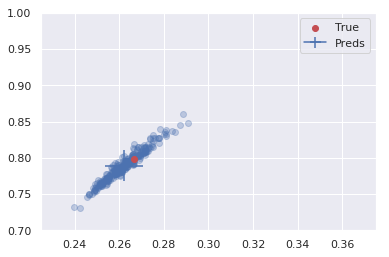

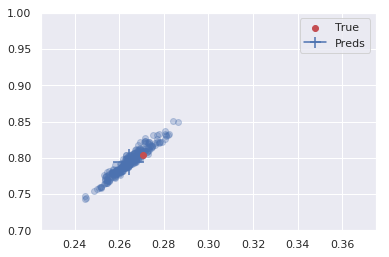

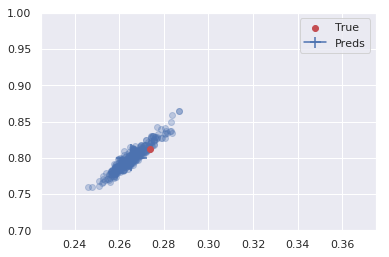

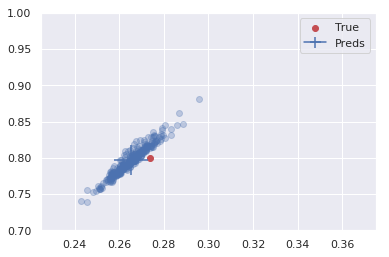

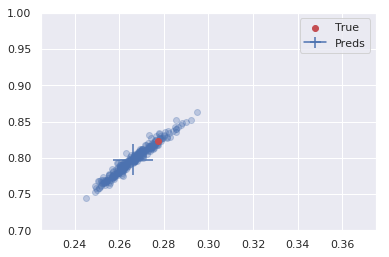

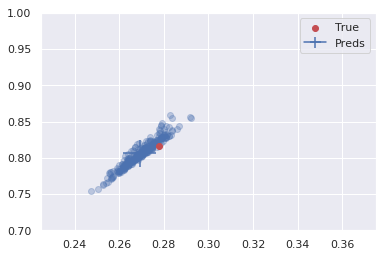

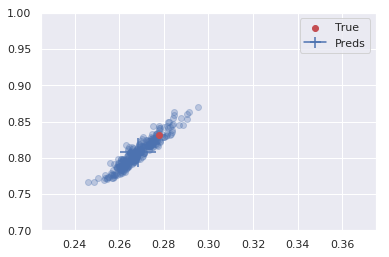

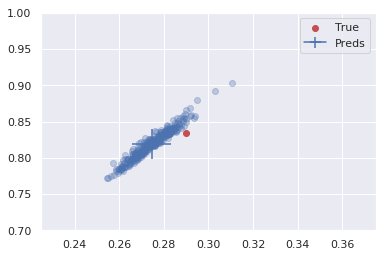

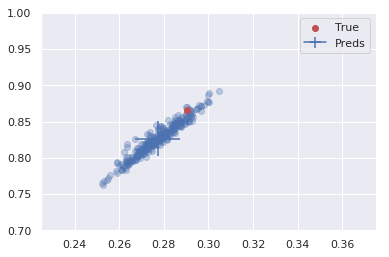

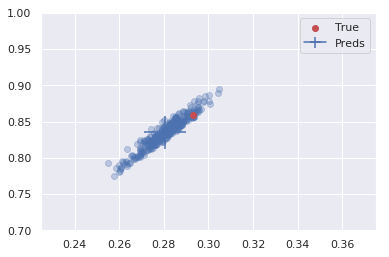

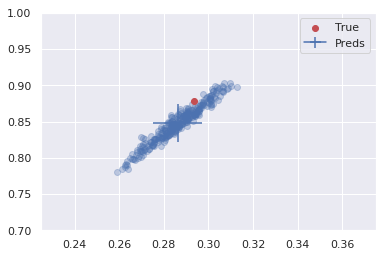

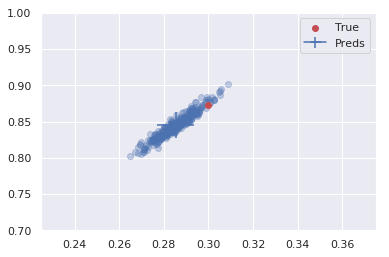

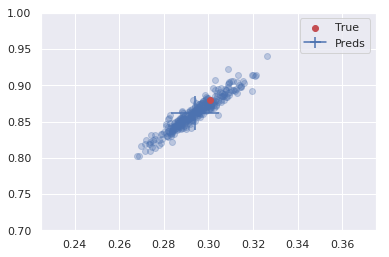

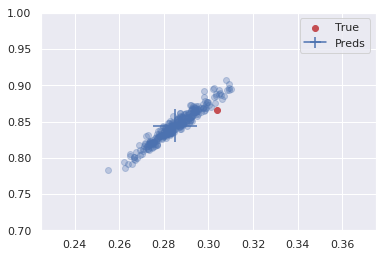

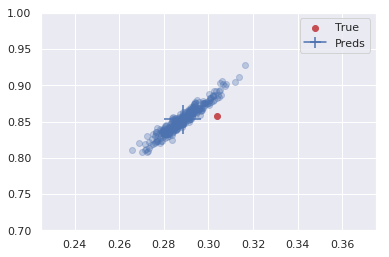

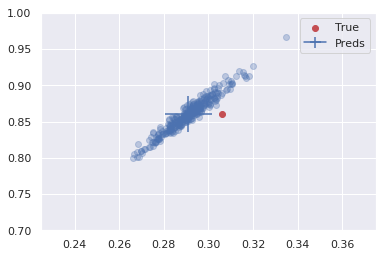

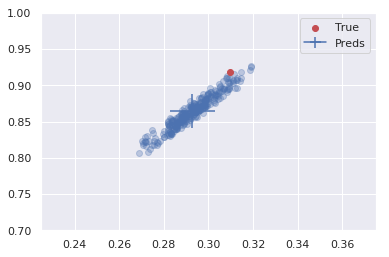

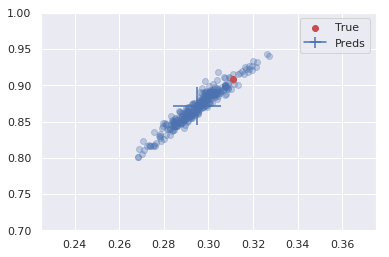

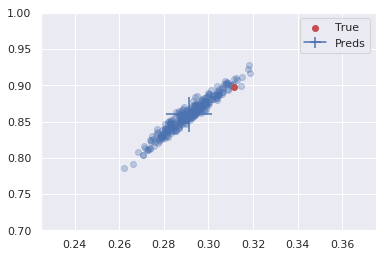

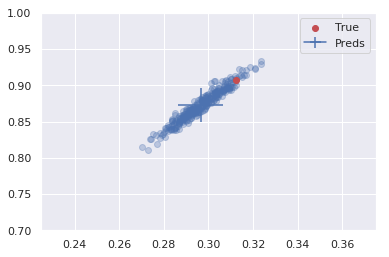

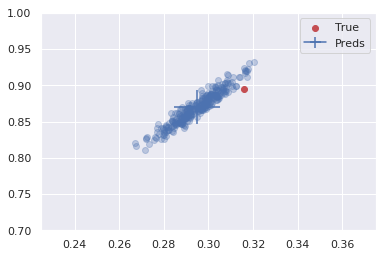

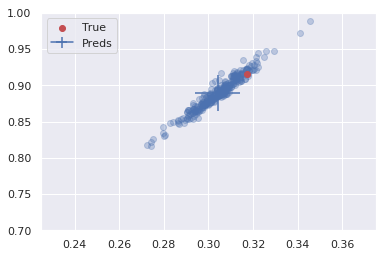

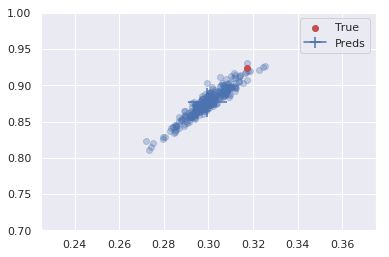

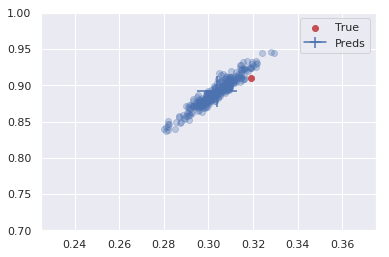

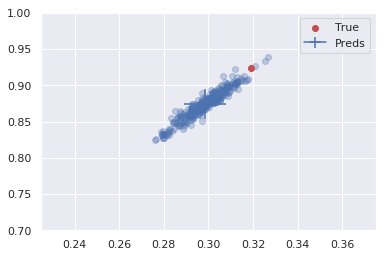

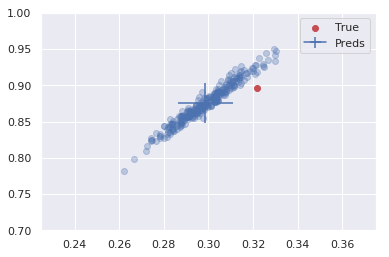

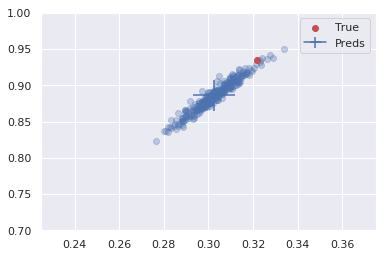

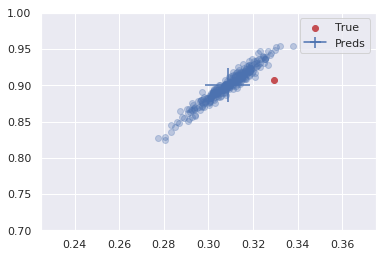

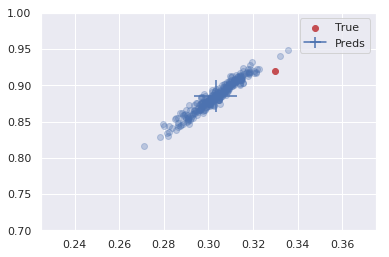

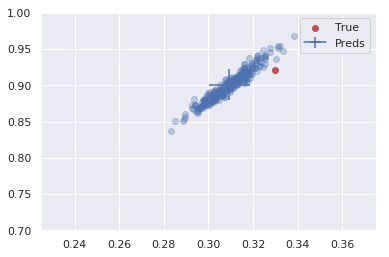

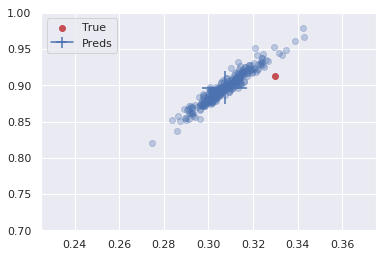

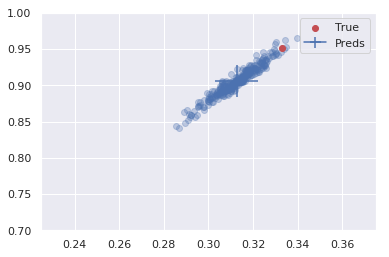

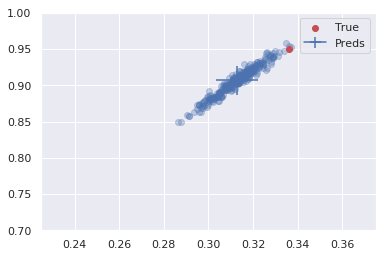

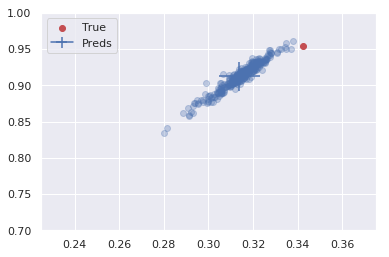

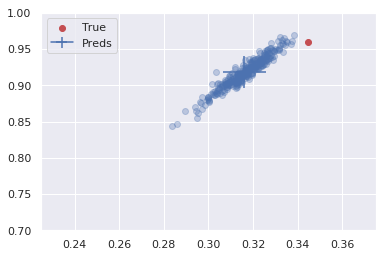

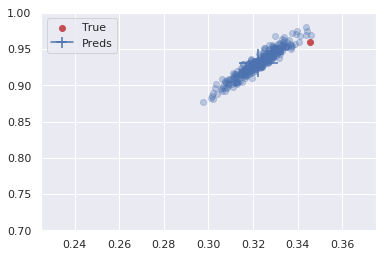

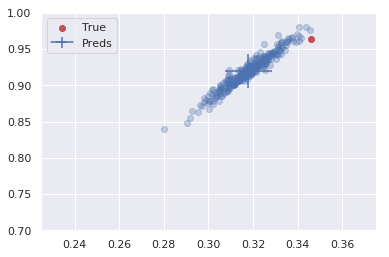

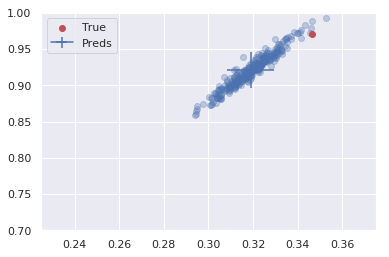

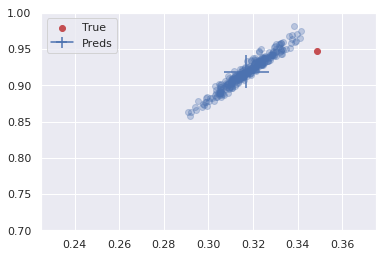

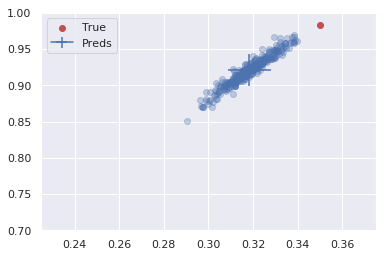

In [23]:
for cosmo_idx, true_val in enumerate(f.keys()):
    tvs = true_val.split('_')
    
    true_vals = np.array((float(tvs[1]), float(tvs[3]) )).reshape((1,2))
    preds = np.zeros((289, 2))
    #continue
    #print true_val
    for idx, map in enumerate(f[key_func(true_vals)]):
        #print f[key_func(true_vals)][map].value.shape
        preds[idx,:] =  f[key_func(true_vals)][map].value
        #pass
        if idx == 0:
            cosmo_true[cosmo_idx] = true_vals[0, :]
    #print preds.mean(axis = 0)
    plt.scatter(preds[:,0], preds[:,1], color = 'b', alpha = 0.3)

    plt.errorbar(preds[:,0].mean(), preds[:,1].mean(), yerr = preds[:,1].std(), xerr=preds[:,0].std(), color = 'b', label = 'Preds')
    
    cosmo_preds[cosmo_idx, :2] = preds.mean(axis = 0)
    cosmo_preds[cosmo_idx,2:] = preds.std(axis =0)
    plt.scatter(true_vals[0,0], true_vals[0,1], color = 'r', label = 'True')
    
    plt.legend(loc='best')
    plt.xlim([0.225, 0.375])
    plt.ylim([0.7, 1.0])
    plt.show()

In [24]:
f.close()

In [25]:
#fname = '/home/sean/Git/uatu/data/snd4.samples.hdf5'
fname = '/scratch/users/swmclau2/UatuLightconeTest/snd_attacked.samples.hdf5'

In [26]:
f = h5py.File(fname, 'r')

In [27]:
len(f.keys())

25

In [28]:
cosmo_preds_attacked = np.zeros_like(cosmo_preds)
cosmo_true_attacked = np.zeros_like(cosmo_true)

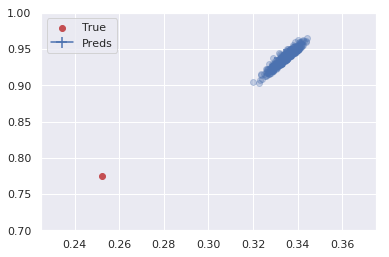

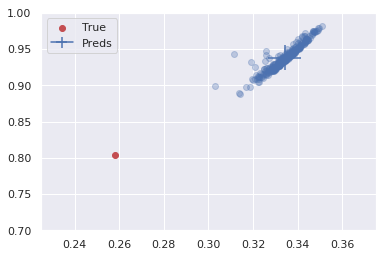

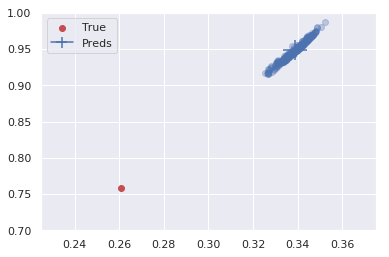

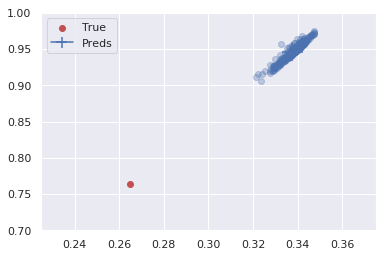

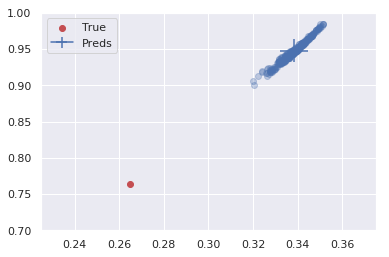

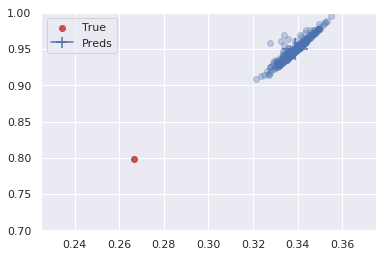

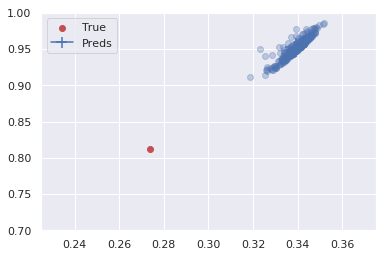

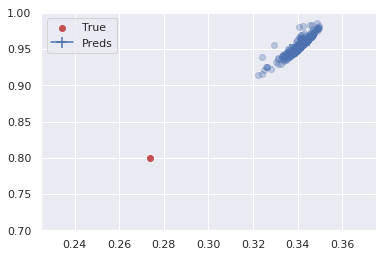

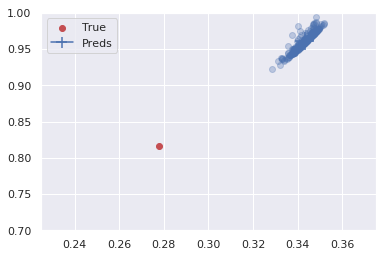

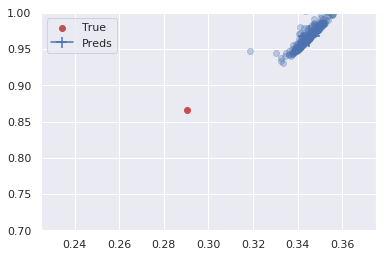

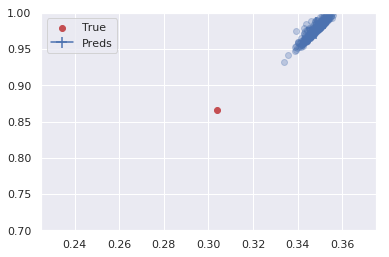

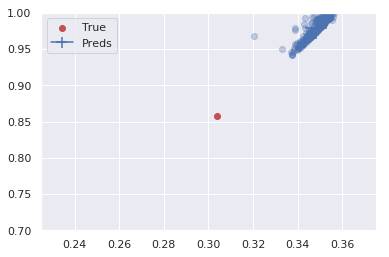

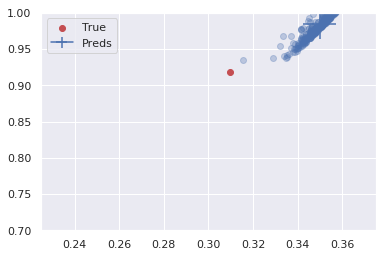

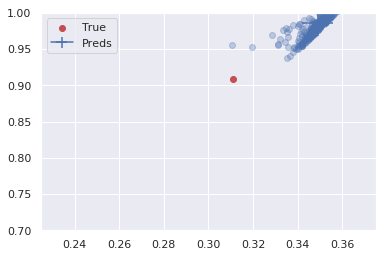

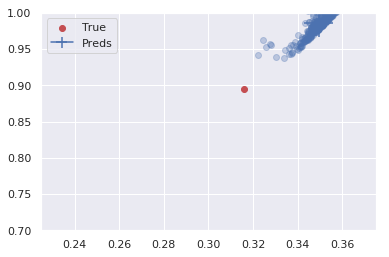

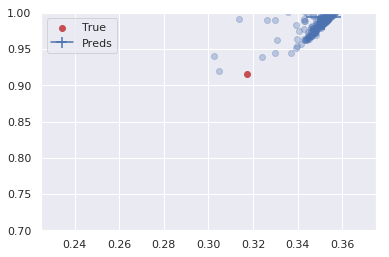

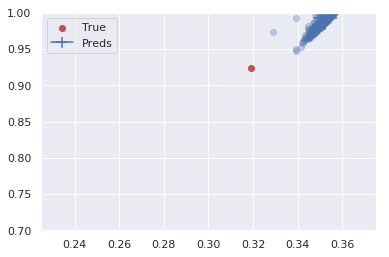

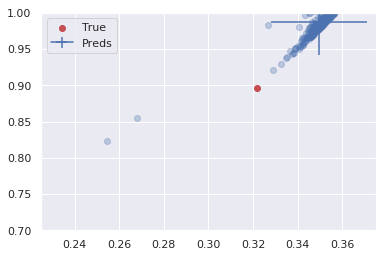

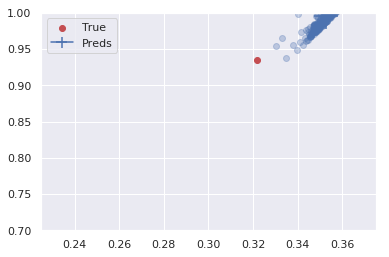

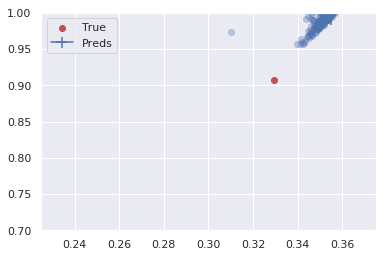

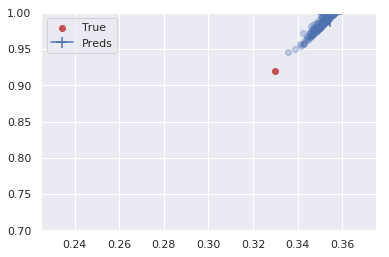

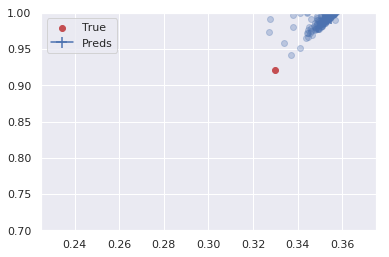

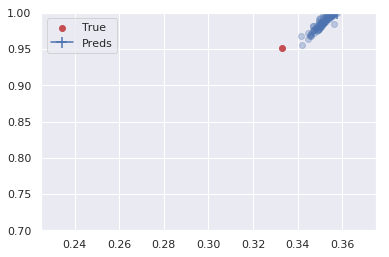

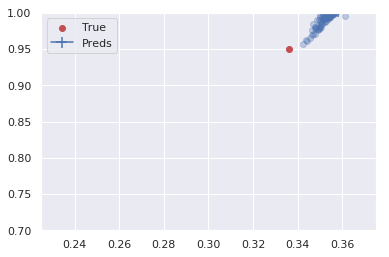

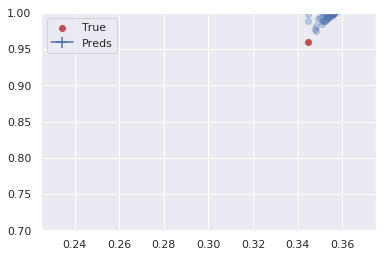

In [29]:
for cosmo_idx, true_val in enumerate(f.keys()):
    tvs = true_val.split('_')
    
    true_vals = np.array((float(tvs[1]), float(tvs[3]) )).reshape((1,2))
    preds = np.zeros((289, 2))
    #continue
    #print true_val
    for idx, map in enumerate(f[key_func(true_vals)]):
        #print f[key_func(true_vals)][map].value.shape
        preds[idx,:] =  f[key_func(true_vals)][map].value
        #pass
        if idx == 0:
            #cosmo_true[cosmo_idx] = true_vals[0, :]
            plt.scatter(true_vals[0,0], true_vals[0,1], color = 'r', label = 'True')
    #print preds.mean(axis = 0)
    plt.scatter(preds[:,0], preds[:,1], color = 'b', alpha = 0.3)

    plt.errorbar(preds[:,0].mean(), preds[:,1].mean(), yerr = preds[:,1].std(), xerr=preds[:,0].std(), color = 'b', label = 'Preds')
    
    box_idx = np.where(true_vals[0,:]==cosmo_true)[0][0]
    cosmo_preds_attacked[box_idx, :2] = preds[np.all(preds!=0.0, axis = 1)].mean(axis = 0)
    cosmo_preds_attacked[box_idx,2:] = preds[np.all(preds!=0.0, axis = 1)].std(axis =0)
    
    plt.legend(loc='best')
    plt.xlim([0.225, 0.375])
    plt.ylim([0.7, 1.0])
    plt.show()

In [30]:
f.close()

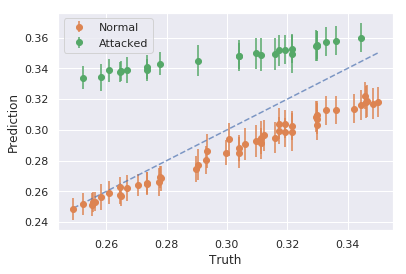

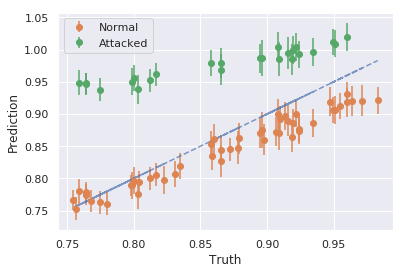

In [31]:
for i in xrange(2):
    plt.plot(cosmo_true[:,i], cosmo_true[:,i], ls = '--', alpha = 0.7)
    plt.errorbar(cosmo_true[:, i], cosmo_preds[:,i], yerr = cosmo_preds[:,i+2], fmt = 'o', label = 'Normal')
    nonzero_idxs = np.where(np.all(cosmo_preds_attacked != 0.0, axis =1))[0]
    plt.errorbar(cosmo_true[nonzero_idxs, i], cosmo_preds_attacked[nonzero_idxs,i],\
                 yerr = cosmo_preds[nonzero_idxs,i+2], fmt = 'o', label = 'Attacked')

    plt.legend(loc = 'best')
    plt.ylabel('Prediction')
    plt.xlabel('Truth')
    plt.show()